In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

In [4]:
import torch.optim as optim

In [5]:
import torch.nn as nn

In [7]:
from fastai.vision.all import untar_data,URLs

In [8]:
alexnet = models.alexnet(pretrained=True)

In [9]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [11]:
source = untar_data(URLs.IMAGEWOOF_160)

In [12]:
train_data = torchvision.datasets.ImageFolder(source/'train/',\
                                              transform=train_transform)
test_data = torchvision.datasets.ImageFolder(source/'val/',\
                                             transform=test_transform)

In [13]:
train_data[0][0].shape

torch.Size([3, 224, 224])

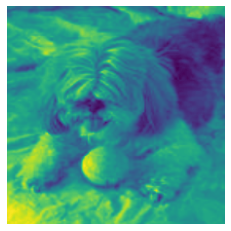

In [14]:
plt.imshow(train_data[0][0][1])
plt.axis('off')
plt.show()

In [15]:
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=4, shuffle=True)

In [16]:
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=4, shuffle=True)

In [17]:
classes = ('Australian terrier', 'Border terrier', 'Samoyed', 'Beagle', 'Shih-Tzu', 'English foxhound',\
           'Rhodesian ridgeback', 'Dingo', 'Golden retriever', 'Old English sheepdog')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


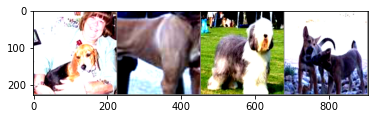

Beagle,Border terrier,Dingo,Old English sheepdog


In [18]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
images, labels = next(iter(trainloader))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(','.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
alexnet.classifier[1] = nn.Linear(9216,4096)
alexnet.classifier[4] = nn.Linear(4096,1024)
alexnet.classifier[6] = nn.Linear(1024,10)

In [20]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

In [22]:
for epoch in range(7):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = alexnet(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training of AlexNet')


[1,   500] loss: 1.714
[1,  1000] loss: 1.512
[1,  1500] loss: 1.441
[1,  2000] loss: 1.412
[2,   500] loss: 1.336
[2,  1000] loss: 1.313
[2,  1500] loss: 1.293
[2,  2000] loss: 1.292
[3,   500] loss: 1.165
[3,  1000] loss: 1.181
[3,  1500] loss: 1.213
[3,  2000] loss: 1.192
[4,   500] loss: 1.138
[4,  1000] loss: 1.172
[4,  1500] loss: 1.167
[4,  2000] loss: 1.169
[5,   500] loss: 1.074
[5,  1000] loss: 1.041
[5,  1500] loss: 1.115
[5,  2000] loss: 1.098
[6,   500] loss: 1.062
[6,  1000] loss: 1.077
[6,  1500] loss: 1.041
[6,  2000] loss: 1.073
[7,   500] loss: 1.016
[7,  1000] loss: 0.992
[7,  1500] loss: 0.983
[7,  2000] loss: 1.070
Finished Training of AlexNet


In [23]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on test images: 71.24 %


In [24]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        
        if data[0].shape[0] == 1:
            class_correct[labels] += c
            class_total[labels] += 1
        else:
            for i in range(data[0].shape[0]):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Australian terrier : 81 %
Accuracy of Border terrier : 90 %
Accuracy of Samoyed : 78 %
Accuracy of Beagle : 47 %
Accuracy of Shih-Tzu : 69 %
Accuracy of English foxhound : 65 %
Accuracy of Rhodesian ridgeback : 58 %
Accuracy of Dingo : 52 %
Accuracy of Golden retriever : 81 %
Accuracy of Old English sheepdog : 75 %


In [25]:
#Verifying average accuracy of the network
print('Average accuracy = {:.3f}%'.format(100 * (np.array(class_correct) / np.array(class_total)).mean()))

Average accuracy = 70.141%
